# Index

<pre>
1. Importing Libraries
2. Loading Data:
    a. Count Matrix: Expression count
    b. Biospecimen Data
    c. Clinical Data
    d. RNAseq Metadata
</pre>

# 1. Importing Libraries

In [17]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import pickle as pkl

# Libraries from differential Expression Analysis

import conorm
import plotly.express as px
import plotly.offline as pyo

# 2. Loading Data

## 2.1 Count Matrix (Expression Data)

In [18]:
count_matrix = pd.read_csv("../../../ROSMAP_DATA/ROSMAP_all_counts_matrix.txt", sep = '\t')
biospecimen_metadata = pd.read_csv('../../../ROSMAP_DATA/ROSMAP_biospecimen_metadata.csv')
clinical_data = pd.read_csv('../../../ROSMAP_DATA/ROSMAP_clinical.csv')
rna_seq_metadata = pd.read_csv('../../../ROSMAP_DATA/ROSMAP_assay_rnaSeq_metadata.csv').drop_duplicates()

In [19]:
count_matrix.drop(index = count_matrix.index[:4], inplace=True)
count_matrix = count_matrix.T.drop_duplicates().T
count_matrix.head()

,feature,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
4,ENSG00000223972.5,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ENSG00000227232.5,99,174,78,188,56,81,87,157,136,...,83,188,256,91,413,93,98,171,236,322
6,ENSG00000278267.1,2,5,5,4,2,1,1,2,2,...,0,6,4,3,10,0,1,7,3,8
7,ENSG00000243485.3,0,5,2,5,3,0,0,0,0,...,3,0,0,6,2,1,2,2,2,2
8,ENSG00000274890.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
#clinical_data

In [11]:
clinical_data = clinical_data[clinical_data.individualID.isin(data.columns)]

In [4]:
print(f'Total Number of Genes: {count_matrix.shape[0]}')

Total Number of Genes: 60725


In [129]:
count_matrix.isnull().sum().sum()

0

In [130]:
import pickle
with open('NCI_with_No_Plaques.pkl','rb') as f:
    NCI_with_No_Plaques= pickle.load(f)

with open('AD_with_Plaques.pkl','rb') as f:
    AD_with_Plaques= pickle.load(f)

with open('AD_with_No_Plaques.pkl','rb') as f:
    AD_with_No_Plaques= pickle.load(f)

with open('NCI_with_Plaques.pkl','rb') as f:
    NCI_with_Plaques = pickle.load(f)

In [131]:
clinical_data = clinical_data[~clinical_data.cogdx.isna()]

In [2]:
#clinical_data = clinical_data[~clinical_data.ceradsc.isna()]
clinical_data.head()

In [133]:
clinical_data.columns

Index(['projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'age_at_visit_max', 'age_first_ad_dx', 'age_death',
       'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc',
       'cogdx', 'dcfdx_lv', 'individualID'],
      dtype='object')

In [3]:
biospecimen_metadata.head(2)

In [5]:
biospecimen_metadata = biospecimen_metadata[biospecimen_metadata.assay == 'rnaSeq' ]
biospecimen_metadata = biospecimen_metadata[biospecimen_metadata.nucleicAcidSource == 'bulk cell' ]
biospecimen_metadata = biospecimen_metadata[biospecimen_metadata.tissue == 'dorsolateral prefrontal cortex' ]
biospecimen_metadata = biospecimen_metadata[~biospecimen_metadata.individualID.isna()  ]

biospecimen_metadata

"biospecimen_metadata = biospecimen_metadata[biospecimen_metadata.assay == 'rnaSeq' ]\nbiospecimen_metadata = biospecimen_metadata[biospecimen_metadata.nucleicAcidSource == 'bulk cell' ]\nbiospecimen_metadata = biospecimen_metadata[biospecimen_metadata.tissue == 'dorsolateral prefrontal cortex' ]\nbiospecimen_metadata = biospecimen_metadata[~biospecimen_metadata.individualID.isna()  ]\n\nbiospecimen_metadata"

In [136]:
sum(biospecimen_metadata.individualID.isna())

0

In [137]:
specimenID = count_matrix.columns.values[1:]

In [138]:
biospecimen_metadata = biospecimen_metadata[biospecimen_metadata.specimenID.isin(specimenID)]

In [6]:
biospecimen_metadata[biospecimen_metadata.specimenID.isin(['316_120501','764_130520','791_130530','800_130701'])]

In [140]:
def return_specimenid(indvidualid):
    
    x = biospecimen_metadata[biospecimen_metadata.individualID == indvidualid]['specimenID'].values
    try:
        return x[0]
    except:
        return np.nan

In [141]:
clinical_data['specimenID'] = clinical_data.individualID.apply(return_specimenid)

In [142]:
clinical_data = clinical_data[~clinical_data['specimenID'].isna()]

In [143]:
clinical_data.cogdx.value_counts()

cogdx
4.0    222
1.0    201
2.0    158
5.0     33
6.0     12
3.0     10
Name: count, dtype: int64

In [7]:
clinical_data[clinical_data.specimenID.isin(['316_120501','764_130520','791_130530','800_130701'])]

In [8]:
rna_seq_metadata

In [146]:
clinical_data = clinical_data.merge(rna_seq_metadata, on='specimenID', how='left').drop_duplicates()

In [9]:
clinical_data

In [10]:
clinical_data[clinical_data.specimenID.isin(NCI_with_Plaques)].age_death.value_counts()

In [11]:
clinical_data[clinical_data.specimenID.isin(AD_with_Plaques)].age_death.value_counts()

In [12]:
clinical_data[clinical_data.specimenID.isin(NCI_with_Plaques)].msex.value_counts()

In [14]:
clinical_data[clinical_data.specimenID.isin(AD_with_Plaques)].msex.value_counts()

In [15]:
#pd.set_option('display.max_columns', 20)
#clinical_data[clinical_data.specimenID.isin(['316_120501','764_130520','791_130530','800_130701'])]

In [224]:
clinical_data = clinical_data[~clinical_data.specimenID.isin(['316_120501','764_130520','791_130530','800_130701','380_120503'])]

In [228]:
clinical_data.cogdx.value_counts()

cogdx
4.0    220
1.0    200
2.0    158
5.0     33
6.0     12
3.0     10
Name: count, dtype: int64

In [229]:
'''clinical_data.cogdx = clinical_data['cogdx'].replace([1.0],'NCI')
clinical_data.cogdx  = clinical_data['cogdx'].replace([2.0],'MCI')
clinical_data.cogdx  = clinical_data['cogdx'].replace([3.0],'MCI_with_AD_eith_Other')
clinical_data.cogdx  = clinical_data['cogdx'].replace([4.0],'AD')
clinical_data.cogdx  = clinical_data['cogdx'].replace([5.0],'AD_with_Other')
clinical_data.cogdx  = clinical_data['cogdx'].replace([6.0],'Other Dementia')'''

"clinical_data.cogdx = clinical_data['cogdx'].replace([1.0],'NCI')\nclinical_data.cogdx  = clinical_data['cogdx'].replace([2.0],'MCI')\nclinical_data.cogdx  = clinical_data['cogdx'].replace([3.0],'MCI_with_AD_eith_Other')\nclinical_data.cogdx  = clinical_data['cogdx'].replace([4.0],'AD')\nclinical_data.cogdx  = clinical_data['cogdx'].replace([5.0],'AD_with_Other')\nclinical_data.cogdx  = clinical_data['cogdx'].replace([6.0],'Other Dementia')"

In [16]:
#clinical_data.ceradsc

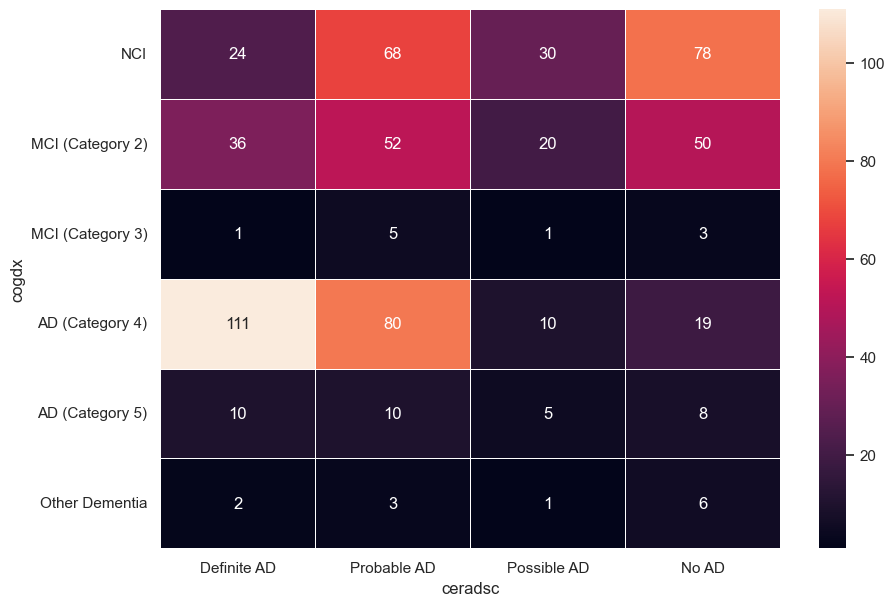

In [231]:
import seaborn as sns
ct = pd.crosstab(clinical_data['cogdx'], clinical_data['ceradsc'])
#ct.iloc[3] = ct.iloc[4] + ct.iloc[3]
#ct = ct.drop(ct.iloc[4].name)
plt.figure(figsize = (10,7))
x_axis_labels = ['Definite AD', 'Probable AD','Possible AD', 'No AD'] # labels for x-axis
y_axis_labels = ['NCI','MCI (Category 2)', 'MCI (Category 3)', 'AD (Category 4)','AD (Category 5)', 'Other Dementia'] # labels for y-axis
sns_plot = sns.heatmap(ct, annot = True, linewidth=.5, fmt=".0f", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
fig = sns_plot.get_figure()
fig.savefig("output.png")

In [232]:
ct = ct.drop(ct.iloc[2].name)
ct = ct.drop(ct.iloc[1].name)
ct

ceradsc,1.0,2.0,3.0,4.0
cogdx,,,,
1.0,24,68,30,78
4.0,111,80,10,19
5.0,10,10,5,8
6.0,2,3,1,6


In [233]:
ct = ct[[1.0,4.0]]
ct

ceradsc,1.0,4.0
cogdx,,
1.0,24,78
4.0,111,19
5.0,10,8
6.0,2,6


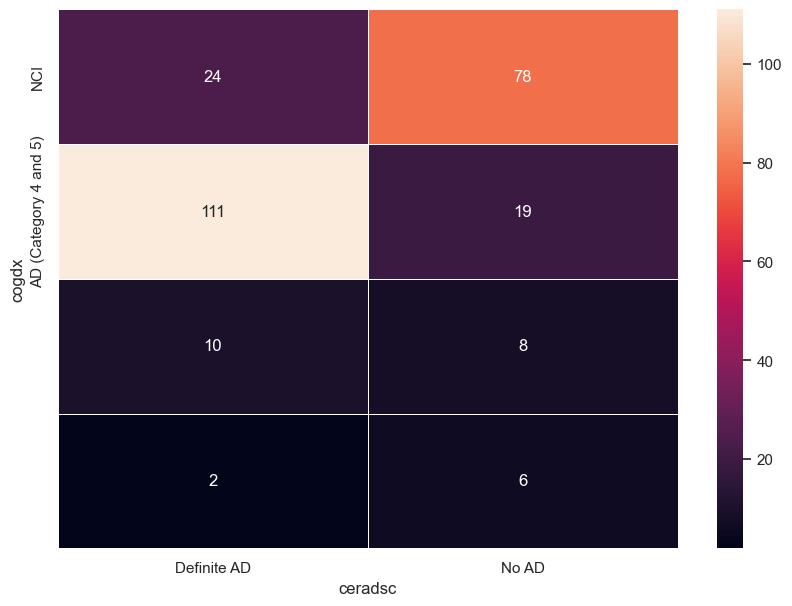

In [234]:
plt.figure(figsize = (10,7))
x_axis_labels = ['Definite AD','No AD'] # labels for x-axis
y_axis_labels = ['NCI', 'AD (Category 4 and 5)'] # labels for y-axis
sns_plot = sns.heatmap(ct, annot = True, linewidth=.5, fmt=".0f", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
fig = sns_plot.get_figure()
fig.savefig("output.png")

In [235]:
clinical_data.cogdx.value_counts()

cogdx
4.0    220
1.0    200
2.0    158
5.0     33
6.0     12
3.0     10
Name: count, dtype: int64

In [22]:
clinical_data.head()

In [23]:
'''
def case_divide(row):
  
    if row.cogdx == 1:
        return 'NCI'
    elif (row.cogdx == 2 or row.cogdx == 3):
        return 'MCI'
    else:
        return 'AD'
    
def case_divide_ceradsc(row):
  
   
    if (row.ceradsc == 1 or row.ceradsc == 2):
        return 'AD'
    else:
        return 'No AD'
    
'''

"\ndef case_divide(row):\n  \n    if row.cogdx == 1:\n        return 'NCI'\n    elif (row.cogdx == 2 or row.cogdx == 3):\n        return 'MCI'\n    else:\n        return 'AD'\n    \ndef case_divide_ceradsc(row):\n  \n   \n    if (row.ceradsc == 1 or row.ceradsc == 2):\n        return 'AD'\n    else:\n        return 'No AD'\n    \n"

In [242]:
def case_divide(row):
  
    if row.cogdx == 1 and row.ceradsc == 1: # cogdx 1 : NCI, Cerad: 1 AD
        return 'NCI with Plaques'
    elif (row.cogdx == 1 and row.ceradsc== 4):# cogdx 1 : NCI, Cerad: 4 No AD
        return 'NCI with No Plaques'
    elif (row.cogdx == 4 and row.ceradsc== 4):# cogdx 4 : AD, Cerad: 4 No AD
        return 'AD with No Plaques'
    elif (row.cogdx == 4 and row.ceradsc== 1): # cogdx 4 : AD, Cerad: 1 AD
        return 'AD with Plaques'
    else:
        return 'No_Use'
    

    

In [243]:
clinical_data['Diagnosis'] = clinical_data.apply(case_divide, axis = 1)


/var/folders/ld/fhtyx4qs4mg6bw9chm___tsh0000gn/T/ipykernel_99704/3297434941.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
clinical_data.Diagnosis.value_counts()

Diagnosis
No_Use                 401
AD with Plaques        111
NCI with No Plaques     78
NCI with Plaques        24
AD with No Plaques      19
Name: count, dtype: int64

In [247]:
AD_with_Plaques = list(clinical_data[clinical_data.Diagnosis=='AD with Plaques'].specimenID)
NCI_with_Plaques = list(clinical_data[clinical_data.Diagnosis=='NCI with Plaques'].specimenID)
AD_with_No_Plaques = list(clinical_data[clinical_data.Diagnosis=='AD with No Plaques'].specimenID)
NCI_with_No_Plaques = list(clinical_data[clinical_data.Diagnosis=='NCI with No Plaques'].specimenID)

In [116]:
cclinical_data.to_csv('/Users/anwer/Desktop/Gene_Regulatory_Network_ROSMAP_Analysis/clinical_data_preprocessed.csv', index = False)

In [121]:
clinical_data.to_csv('../../Constructed_GRN/clinical_data_curated.csv', index = False)

In [124]:
count_matrix = count_matrix.drop(columns = ['316_120501','764_130520','791_130530','800_130701','380_120503'])
count_matrix_raw = count_matrix.copy()
count_matrix_raw

,feature,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
4,ENSG00000223972.5,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ENSG00000227232.5,99,174,78,188,56,81,87,157,136,...,83,188,256,91,413,93,98,171,236,322
6,ENSG00000278267.1,2,5,5,4,2,1,1,2,2,...,0,6,4,3,10,0,1,7,3,8
7,ENSG00000243485.3,0,5,2,5,3,0,0,0,0,...,3,0,0,6,2,1,2,2,2,2
8,ENSG00000274890.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60724,ENSG00000277374.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60725,ENSG00000278806.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60726,ENSG00000274152.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60727,ENSG00000276666.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
count_matrix[(count_matrix == 0).all(axis=1)]

,feature,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501


## 2. CPM normalization on all Data

In [130]:
from bioinfokit.analys import norm

In [131]:
from rnanorm import CPM

In [132]:
count_matrix = count_matrix.set_index('feature')

In [133]:
count_matrix_cpm_normalized = CPM().set_output(transform="pandas").fit_transform(count_matrix.T)
count_matrix_cpm_normalized  = count_matrix_cpm_normalized.T
count_matrix_cpm_normalized.head()

,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,102_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
ENSG00000223972.5,0.033735,0.031708,0.049731,0.000000,0.059849,0.000000,0.000000,0.050887,0.038836,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000227232.5,3.339807,5.517235,3.878985,7.536497,3.351529,4.012606,2.887423,7.989205,5.281712,4.916607,...,4.281013,6.747660,7.936127,4.634431,13.545480,3.884234,3.885698,8.738669,7.114166,9.689773
ENSG00000278267.1,0.067471,0.158541,0.248653,0.160351,0.119697,0.049538,0.033189,0.101773,0.077672,0.192808,...,0.000000,0.215351,0.124002,0.152783,0.327978,0.000000,0.039650,0.357723,0.090434,0.240740
ENSG00000243485.3,0.000000,0.158541,0.099461,0.200439,0.179546,0.000000,0.000000,0.000000,0.000000,0.144606,...,0.154735,0.000000,0.000000,0.305567,0.065596,0.041766,0.079300,0.102207,0.060290,0.060185
ENSG00000274890.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
count_matrix = count_matrix[(count_matrix_cpm_normalized >= 1).astype(int).sum(axis=1)>= 633/2]
count_matrix.shape

(17110, 633)

In [135]:
count_matrix 

,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,102_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
feature,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232.5,99,174,78,188,56,81,87,157,136,102,...,83,188,256,91,413,93,98,171,236,322
ENSG00000268903.1,57,165,50,34,55,56,51,15,82,30,...,27,23,17,47,48,58,68,98,35,11
ENSG00000279457.3,288,543,277,392,303,164,239,298,450,200,...,163,142,459,184,474,193,384,473,640,803
ENSG00000228463.9,28,57,48,69,34,13,23,36,117,75,...,1,47,28,80,84,50,42,30,121,104
ENSG00000225972.1,285,107,137,43,147,149,143,113,79,35,...,39,95,215,57,85,126,114,96,53,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273748.1,155,588,240,180,262,235,339,344,237,49,...,435,67,184,128,171,419,266,380,189,388
ENSG00000271254.6,202,201,42,152,68,76,73,154,200,151,...,244,392,323,112,372,161,113,114,402,379
ENSG00000277048.1,15950,9566,4091,1357,3850,5844,9731,6513,2887,1734,...,804,1850,1711,883,2967,7325,7676,3696,4521,1616


In [136]:
count_matrix_mrn = conorm.mrn(count_matrix )
count_matrix_mrn

,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,102_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
feature,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232.5,147.015425,133.654152,125.555213,153.062447,110.143486,149.697553,142.088406,227.011105,126.751403,105.982693,...,85.950823,219.214081,214.472294,94.298779,310.956416,192.237113,134.203827,227.846224,147.824783,185.285514
ENSG00000268903.1,84.645245,126.741006,80.484111,27.681506,108.176638,103.494605,83.293203,21.688959,76.42364,31.17138,...,27.959906,26.818744,14.242301,48.703765,36.140213,119.889812,93.121023,130.578538,21.923167,6.329629
ENSG00000279457.3,427.681236,417.09313,445.881973,319.151484,595.954931,303.091342,390.334815,430.887319,419.398024,207.809202,...,168.794989,165.576593,384.54212,190.670059,356.884603,398.943686,525.859894,630.241309,400.880767,462.062944
ENSG00000228463.9,41.58012,43.783257,77.264746,56.177175,66.872831,24.025533,37.563601,52.053502,109.043486,77.928451,...,1.035552,54.80352,23.457907,82.900026,63.245373,103.353287,57.515926,39.973022,75.79152,59.843769
ENSG00000225972.1,423.226224,82.189622,220.526463,35.008964,289.12665,275.369573,233.547609,163.390158,73.627653,36.36661,...,40.386531,110.773073,180.123215,59.066268,63.998294,260.450282,156.114656,127.913669,33.197938,51.212456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273748.1,230.175665,451.658859,386.323731,146.549151,515.314164,434.307716,553.654822,497.400127,220.882959,50.913254,...,450.465155,78.124167,154.151961,132.640041,128.749509,866.100541,364.26753,506.324942,118.385101,223.26329
ENSG00000271254.6,299.970867,154.39359,67.606653,123.752616,133.745661,140.456963,119.223605,222.673313,186.399122,156.895947,...,252.674708,457.084679,270.603714,116.060036,280.08665,332.797583,154.745229,151.897482,251.803232,218.084503
ENSG00000277048.1,23685.818473,7347.905857,6585.209929,1104.817766,7572.364631,10800.401238,15892.669827,9417.346013,2690.671322,1801.705777,...,832.583873,2157.159837,1433.445682,915.009034,2233.916914,15141.256476,10511.720165,4924.676274,2831.846791,929.880096


In [24]:
count_matrix_mrn = pd.read_csv('count_matrix_mrn.csv')
count_matrix_mrn

In [ ]:
count_matrix_mrn = count_matrix_mrn.T

count_matrix_mrn.columns = count_matrix_mrn.iloc[0]

# Remove the first row (index 0) as it's now the header
count_matrix_mrn =count_matrix_mrn.iloc[1:]
count_matrix_mrn

In [95]:
count_matrix_mrn.reset_index(inplace = True)

In [96]:
import pickle
with open('NCI_with_No_Plaques.pkl','rb') as f:
    NCI_with_No_Plaques= pickle.load(f)

with open('AD_with_Plaques.pkl','rb') as f:
    AD_with_Plaques= pickle.load(f)

with open('AD_with_No_Plaques.pkl','rb') as f:
    AD_with_No_Plaques= pickle.load(f)

with open('NCI_with_Plaques.pkl','rb') as f:
    NCI_with_Plaques = pickle.load(f)

In [99]:
count_matrix_mrn.head()

symbol,index,ENSG00000227232,ENSG00000268903,ENSG00000279457,ENSG00000228463,ENSG00000229344,ENSG00000248527,ENSG00000198744,ENSG00000228327,ENSG00000237491,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000210196
0,01_120405,147.015425,84.645245,427.681236,41.58012,576.181666,115721.929541,319.275923,22.275064,69.795202,...,40218.371267,1271964.092125,1566753.779333,794321.371306,191803.154484,2893296.234239,1039378.264742,272925.969002,1397546.450171,14814.402827
1,02_120405,133.654152,126.741006,417.09313,43.783257,176.669282,22016.064986,148.248571,86.798386,93.711532,...,15647.521451,433118.569933,567423.32587,150705.810281,50260.874337,857044.960336,280904.157614,60520.75083,472285.381518,5610.401879
2,03_120405,125.555213,80.484111,445.881973,77.264746,268.816929,34353.837767,181.89409,38.632373,80.484111,...,19375.744785,809472.161677,948183.306924,325748.169859,102831.328743,1775539.037975,679537.00385,126685.209442,851418.870437,12626.34727
3,04_120405,153.062447,27.681506,319.151484,56.177175,124.566778,15675.874179,74.088737,65.132956,57.805498,...,8274.327895,224817.795815,312141.549891,88184.323256,24977.674454,490453.600977,144523.516013,30894.189343,234222.994658,1698.341827
4,05_120405,110.143486,108.176638,595.954931,66.872831,222.253819,34860.413172,171.115772,55.071743,112.110333,...,17300.394621,794759.988372,1104823.734398,257009.989261,72612.09284,1640107.306172,594949.871368,135767.580708,772308.418954,12648.799205


In [456]:
def return_batch(feature):
    try:
        return clinical_data[clinical_data.specimenID == feature]['libraryBatch'].values[0]
    except:
        return 0

m = list(map(return_batch,count_matrix_filtered_mrn.columns.tolist()))
print(m[0:20])


['2', '1', '4', '5', '6', '2', '2', '5', '5', '2', '6', '2', '4', '5', '3', '6', '5', '6', '0', '6']


In [457]:
from combat.pycombat import pycombat


In [458]:
count_matrix_filtered_mrn_batch_corrected = pycombat(count_matrix_filtered_mrn[~(count_matrix_filtered_mrn == 0).all(axis=1)].astype(float),m)


Found 10 batches.

One batch has only one sample, try setting mean_only=True.

Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


/Users/anwer/miniconda/lib/python3.10/site-packages/combat/pycombat.py:91: RuntimeWarning:

invalid value encountered in scalar divide

/Users/anwer/miniconda/lib/python3.10/site-packages/combat/pycombat.py:93: RuntimeWarning:

invalid value encountered in scalar divide



Adjusting the Data


In [534]:
count_matrix_filtered_mrn_batch_corrected

,02_120405,04_120405,07_120410,08_120410,100_120417,101_120418,104_120418,11_120410,120_120418,122_120418,...,945_131107,94_120417,950_131107,951_131107,952_131107,954_131107,956_131107,958_131107,97_120417,R24_131017
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232,139.179442,159.790850,143.977880,148.083190,220.031510,132.265803,324.338277,171.271482,148.535021,220.102206,...,179.060200,207.598503,118.663026,115.761758,134.899462,192.628239,188.737163,276.629348,139.116520,127.295951
ENSG00000268903,131.050214,34.436433,91.035602,70.793194,15.343736,77.740545,112.544232,78.020120,66.830061,57.947879,...,63.345520,121.582517,27.423797,28.798616,51.905626,70.604233,62.600707,76.558855,79.356409,67.476960
ENSG00000279457,449.896935,421.257284,271.269775,368.830077,437.549369,452.260765,631.813272,350.421244,356.340886,635.139568,...,424.166370,708.456968,339.778335,332.192915,310.227385,271.509438,449.375238,426.381386,490.831711,461.800415
ENSG00000228463,42.029134,48.942688,35.663578,43.846129,50.974887,93.032447,76.297564,69.965474,39.174393,79.473070,...,82.428662,-0.810866,39.383602,59.794417,13.681172,55.405333,28.551877,62.666691,67.287569,73.398813
ENSG00000225972,641.170937,28.879241,-593.909451,878.814627,804.893284,617.593034,660.905706,740.221675,650.211159,628.450481,...,597.475839,665.584658,555.050077,591.404851,553.238927,652.879159,754.308174,584.898783,715.336042,540.073736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000075884,29.882448,37.818718,13.169907,16.187857,18.602246,40.035573,26.774700,16.350919,12.209710,28.077344,...,26.731195,36.800829,26.367840,15.498022,32.755556,18.295556,27.440442,22.864599,13.969436,21.111085
ENSG00000229931,22.558244,18.978174,16.369986,25.084949,29.343703,24.854939,30.897608,18.072581,28.721454,26.581431,...,24.518608,16.585730,28.957466,33.272173,15.621989,22.919188,18.554231,24.667191,26.030537,26.170846
ENSG00000179899,34.379843,30.419527,26.270479,13.939935,9.525089,17.397142,24.487817,18.611773,22.946025,15.985223,...,27.894973,20.889489,40.490574,27.124998,24.126320,23.496921,32.285541,15.860552,22.939899,21.935920


In [482]:
count_matrix_filtered_mrn_batch_corrected.iloc[:,157]

0
ENSG00000227232   NaN
ENSG00000268903   NaN
ENSG00000279457   NaN
ENSG00000228463   NaN
ENSG00000225972   NaN
                   ..
ENSG00000075884   NaN
ENSG00000229931   NaN
ENSG00000179899   NaN
ENSG00000263466   NaN
ENSG00000181195   NaN
Name: 492_120515, Length: 17300, dtype: float64

In [484]:
count_matrix_filtered_mrn.iloc[:,157].astype(int)

0
ENSG00000227232     85
ENSG00000268903     35
ENSG00000279457    259
ENSG00000228463     34
ENSG00000225972     31
                  ... 
ENSG00000075884     18
ENSG00000229931     70
ENSG00000179899     52
ENSG00000263466      6
ENSG00000181195     57
Name: 492_120515, Length: 17300, dtype: int64

In [538]:
count_matrix_filtered_mrn_batch_corrected_2 =count_matrix_filtered_mrn_batch_corrected.dropna(axis =1 )
def return_batch(feature):
    try:
        return int(clinical_data[clinical_data.specimenID == feature]['libraryBatch'].values)
    except:
        return 0

m = list(map(return_batch,count_matrix_filtered_mrn_batch_corrected_2.columns.tolist()))
print(m[0:20])

[2, 1, 4, 5, 6, 2, 2, 5, 5, 2, 6, 2, 4, 5, 3, 6, 5, 6, 0, 6]


In [539]:
import plotly.express as px
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
components = pca.fit_transform(count_matrix_filtered_mrn_batch_corrected_2.T)

fig = px.scatter(components, x=0, y=1, color=m)
fig.write_html("pca_batch(filtered_ad_non_ad_mrn_batch_corrected).html")
fig.show()

# 3. GRN construction Preprocessing


In [328]:
count_matrix_mrn = count_matrix_mrn.reset_index()
count_matrix_mrn = count_matrix_mrn.set_index(count_matrix_mrn['feature'].str.split('.', expand=True)[0])
count_matrix_mrn.drop(columns='feature', inplace = True)
count_matrix_mrn

,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,102_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232,147.015425,133.654152,125.555213,153.062447,110.143486,149.697553,142.088406,227.011105,126.751403,105.982693,...,85.950823,219.214081,214.472294,94.298779,310.956416,192.237113,134.203827,227.846224,147.824783,185.285514
ENSG00000268903,84.645245,126.741006,80.484111,27.681506,108.176638,103.494605,83.293203,21.688959,76.42364,31.17138,...,27.959906,26.818744,14.242301,48.703765,36.140213,119.889812,93.121023,130.578538,21.923167,6.329629
ENSG00000279457,427.681236,417.09313,445.881973,319.151484,595.954931,303.091342,390.334815,430.887319,419.398024,207.809202,...,168.794989,165.576593,384.54212,190.670059,356.884603,398.943686,525.859894,630.241309,400.880767,462.062944
ENSG00000228463,41.58012,43.783257,77.264746,56.177175,66.872831,24.025533,37.563601,52.053502,109.043486,77.928451,...,1.035552,54.80352,23.457907,82.900026,63.245373,103.353287,57.515926,39.973022,75.79152,59.843769
ENSG00000225972,423.226224,82.189622,220.526463,35.008964,289.12665,275.369573,233.547609,163.390158,73.627653,36.36661,...,40.386531,110.773073,180.123215,59.066268,63.998294,260.450282,156.114656,127.913669,33.197938,51.212456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273748,230.175665,451.658859,386.323731,146.549151,515.314164,434.307716,553.654822,497.400127,220.882959,50.913254,...,450.465155,78.124167,154.151961,132.640041,128.749509,866.100541,364.26753,506.324942,118.385101,223.26329
ENSG00000271254,299.970867,154.39359,67.606653,123.752616,133.745661,140.456963,119.223605,222.673313,186.399122,156.895947,...,252.674708,457.084679,270.603714,116.060036,280.08665,332.797583,154.745229,151.897482,251.803232,218.084503
ENSG00000277048,23685.818473,7347.905857,6585.209929,1104.817766,7572.364631,10800.401238,15892.669827,9417.346013,2690.671322,1801.705777,...,832.583873,2157.159837,1433.445682,915.009034,2233.916914,15141.256476,10511.720165,4924.676274,2831.846791,929.880096


#### TF Genes Motif Data

In [329]:
TF_Genes_Motif = pd.read_csv('../../t2t_assembly/T2T_assembly_GRN_input_Data/TF_Genes.txt', sep = '\t')

In [331]:
TF_Genes_Motif

,TF,Genes,Edge,TF_Ensemble
0,ATF7-NPFF,ENSG00000228327,1,ENSG00000267281
1,ATF7-NPFF,ENSG00000237491,1,ENSG00000267281
2,ATF7-NPFF,ENSG00000188290,1,ENSG00000267281
3,ATF7-NPFF,ENSG00000187608,1,ENSG00000267281
4,ATF7-NPFF,ENSG00000234396,1,ENSG00000267281
...,...,...,...,...
2180246,ZSCAN9,ENSG00000185022,1,ENSG00000137185
2180247,ZSCAN9,ENSG00000100417,1,ENSG00000137185
2180248,ZSCAN9,ENSG00000280199,1,ENSG00000137185
2180249,ZSCAN9,ENSG00000260613,1,ENSG00000137185


In [332]:
x = set(TF_Genes_Motif['Genes'].tolist()).union(set(TF_Genes_Motif['TF_Ensemble'].tolist()))

In [333]:
len(x)

60340

In [334]:
y = set(count_matrix_mrn.index)

In [335]:
len(y)

17110

In [336]:
z = y-x

In [26]:
z

In [338]:
count_matrix_mrn.shape

(17110, 633)

In [339]:
def return_true_false(row):
   
    if row[0] in z:
        return 0
    else:
        return 1
df_temp = count_matrix_mrn.reset_index()
l = df_temp.apply(return_true_false,axis = 1)  
df_temp['new_col'] = l
df_temp = df_temp.set_index(0)
df_temp = df_temp[df_temp.new_col == 1]
print(df_temp.shape)

(16957, 634)


In [340]:
count_matrix_mrn = df_temp.drop(columns='new_col')
count_matrix_mrn.shape

(16957, 633)

In [341]:
y = set(count_matrix_mrn.index)

len(y)

16957

In [ ]:
TF_Genes_Motif

In [343]:
def return_true_false(row):
    
    if row.Genes in y and row.TF_Ensemble in y:
        return 1
    else:
        return 0
l = TF_Genes_Motif.apply(return_true_false,axis = 1)     

In [ ]:
TF_Genes_Motif['new_col'] = l
TF_Genes_Motif_temp = TF_Genes_Motif[TF_Genes_Motif['new_col'] == 1]
TF_Genes_Motif = TF_Genes_Motif_temp
TF_Genes_Motif 

In [345]:
x = set(TF_Genes_Motif['Genes'].tolist()).union(set(TF_Genes_Motif['TF_Ensemble'].tolist()))
y = set(count_matrix_mrn.index)

In [346]:
x-y

set()

In [347]:
y-x

set()

In [348]:
TF_in_genes = set(TF_Genes_Motif['Genes'].tolist()).intersection(set(TF_Genes_Motif['TF_Ensemble'].tolist()))

In [349]:
len(TF_in_genes)

712

In [350]:
(set(TF_Genes_Motif['Genes'].tolist())) - y

set()

In [351]:
(set(TF_Genes_Motif['TF_Ensemble'].tolist())) - y

set()

In [352]:
TF_PPI = pd.read_csv('../../t2t_assembly/T2T_assembly_GRN_input_Data/TF_TF_PPI.csv')

In [ ]:
TF_PPI = TF_PPI[['TF_name','Interacting_Partner']]
TF_PPI

In [354]:
y = set(TF_Genes_Motif.TF_Ensemble)

def return_true_false(row):
    
    if row.TF_name in y and row.Interacting_Partner in y:
        return 1
    else:
        return 0
l = TF_PPI.apply(return_true_false,axis = 1)   

In [ ]:
TF_PPI['new_col'] = l
TF_PPI = TF_PPI[TF_PPI['new_col']==1]
TF_PPI = TF_PPI[['TF_name','Interacting_Partner']]
TF_PPI

In [356]:
z = y - set(TF_PPI.Interacting_Partner) 

l = []
for i in z:
    l.append([i,i])
    

In [357]:
len(set(TF_PPI.Interacting_Partner).intersection(set(TF_PPI.TF_name)))  

531

In [358]:
m = pd.DataFrame(l)
df = pd.DataFrame()

In [359]:
df[['TF_name','Interacting_Partner']] = m

In [ ]:
df

In [361]:
TF_PPI = pd.concat([TF_PPI, df])

In [362]:
TF_PPI[2] = 1

In [ ]:
TF_PPI.columns = [[0,1,2]]
TF_PPI

In [ ]:
TF_Genes_Motif = TF_Genes_Motif [[ 'TF_Ensemble','Genes','new_col']]
TF_Genes_Motif.columns = [[0,1,2]]
TF_Genes_Motif

In [ ]:
TF_Genes_Motif.iloc[:,0]

In [375]:
len(set(TF_Genes_Motif.iloc[:,0]))

712

In [376]:
len(set(TF_Genes_Motif.iloc[:,1]))

16957

In [25]:
#count_matrix_mrn

In [ ]:
count_matrix_mrn = count_matrix_mrn.reset_index()
count_matrix_mrn = count_matrix_mrn.rename(columns = {0:'symbol'})
count_matrix_mrn


In [378]:
count_matrix_mrn.to_csv('count_matrix_mrn.csv',index=False)
TF_Genes_Motif.to_csv('TF_Genes.txt',sep = '\t',index = False)
TF_PPI.to_csv('TF_PPI.csv',index = False)

In [ ]:
TF_Genes_Motif

In [ ]:
count_matrix_mrn

In [ ]:
TF_PPI

In [383]:
len(set(TF_PPI.iloc[:,0]))

712

In [384]:
len(set(TF_PPI.iloc[:,1]))

712

In [385]:
len(set(TF_Genes_Motif.iloc[:,0]))

712

In [386]:
count_matrix_mrn.shape[0]

16957

In [387]:
len(set(TF_Genes_Motif.iloc[:,1]))

16957

# GRN

In [2]:
count_matrix = pd.read_csv('count_matrix_mrn.csv')

In [3]:
count_matrix 

,symbol,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,101_120418,...,952_131107,954_131107,956_131107,957_131107,958_131107,96_120417,97_120417,98_120417,R24_131017,redo4_140501
0,ENSG00000227232,1.470154e+02,133.654152,1.255552e+02,153.062447,1.101435e+02,1.496976e+02,1.420884e+02,2.270111e+02,126.751403,...,85.950823,2.192141e+02,214.472294,94.298779,310.956416,1.922371e+02,1.342038e+02,2.278462e+02,147.824783,185.285514
1,ENSG00000268903,8.464524e+01,126.741006,8.048411e+01,27.681506,1.081766e+02,1.034946e+02,8.329320e+01,2.168896e+01,76.423640,...,27.959906,2.681874e+01,14.242301,48.703765,36.140213,1.198898e+02,9.312102e+01,1.305785e+02,21.923167,6.329629
2,ENSG00000279457,4.276812e+02,417.093130,4.458820e+02,319.151484,5.959549e+02,3.030913e+02,3.903348e+02,4.308873e+02,419.398024,...,168.794989,1.655766e+02,384.542120,190.670059,356.884603,3.989437e+02,5.258599e+02,6.302413e+02,400.880767,462.062944
3,ENSG00000228463,4.158012e+01,43.783257,7.726475e+01,56.177175,6.687283e+01,2.402553e+01,3.756360e+01,5.205350e+01,109.043486,...,1.035552,5.480352e+01,23.457907,82.900026,63.245373,1.033533e+02,5.751593e+01,3.997302e+01,75.791520,59.843769
4,ENSG00000229344,5.761817e+02,176.669282,2.688169e+02,124.566778,2.222538e+02,2.698252e+02,2.433468e+02,2.139977e+02,177.079166,...,70.417541,5.363749e+02,323.384005,91.190028,267.286992,4.526874e+02,2.410191e+02,1.532299e+02,229.253688,189.313460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,ENSG00000198886,2.893296e+06,857044.960336,1.775539e+06,490453.600977,1.640107e+06,2.188870e+06,3.311514e+06,1.637930e+06,877492.505452,...,459854.505813,1.272548e+06,950221.172940,397661.060734,615842.028612,3.665503e+06,2.047278e+06,1.119075e+06,393986.870302,303528.169461
16953,ENSG00000198786,1.039378e+06,280904.157614,6.795370e+05,144523.516013,5.949499e+05,6.827354e+05,1.174882e+06,5.773471e+05,308756.165210,...,181315.849359,6.300667e+05,223967.719423,105723.439013,198273.490468,1.113311e+06,6.685158e+05,2.864160e+05,108642.446043,82603.389475
16954,ENSG00000198695,2.729260e+05,60520.750830,1.266852e+05,30894.189343,1.357676e+05,1.369418e+05,2.686385e+05,1.275918e+05,80759.283480,...,35392.063462,1.312206e+05,31962.236243,26375.679424,40007.968675,2.980233e+05,1.652405e+05,5.791158e+04,21774.715772,14821.114868
16955,ENSG00000198727,1.397546e+06,472285.381518,8.514189e+05,234222.994658,7.723084e+05,9.068548e+05,1.431908e+06,7.687117e+05,357723.214489,...,245304.683528,6.998876e+05,295893.851586,166285.016531,351866.383892,1.769935e+06,8.484174e+05,4.349518e+05,248583.031573,147099.435599


In [5]:
count_matrix_mrn_subset = count_matrix.iloc[:,0:200]

In [7]:
from netZooPy.panda.panda import Panda
from netZooPy.lioness import Lioness



In [27]:
# Run GRN_Construction.py

In [8]:
expression_data = 'count_matrix_mrn_subset.csv'
motif_data     = 'TF_Genes.txt'
ppi_data       = 'TF_PPI.csv'
panda_output   = './output_GRNs/AD_output_panda.txt'

In [ ]:
panda_obj = Panda(expression_data, motif_data, ppi_data, save_tmp=True,save_memory = False, remove_missing=False, keep_expression_matrix = False)

Loading motif data ...
  Elapsed time: 0.35 sec.
Loading expression data ...
  Elapsed time: 0.42 sec.
Loading PPI data ...
Number of PPIs: 7237
  Elapsed time: 0.01 sec.
Calculating coexpression network ...
  Elapsed time: 3.87 sec.
Creating motif network ...
  Elapsed time: 1.48 sec.
Creating PPI network ...
  Elapsed time: 0.09 sec.
union TF_Genes.txt count_matrix_mrn_subset.csv TF_PPI.csv False False False
Normalizing networks ...
  Elapsed time: 90.08 sec.
Saving expression matrix and normalized networks ...
  Elapsed time: 1.99 sec.
Running PANDA algorithm ...
Computing panda on CPU
step: 0, hamming: 0.5095132377834074
step: 1, hamming: 0.18786502837610708
step: 2, hamming: 0.15406784015098496
step: 3, hamming: 0.14796758919985573
step: 4, hamming: 0.14516865922440877
step: 5, hamming: 0.1417164689787017
step: 6, hamming: 0.1367335135436309
step: 7, hamming: 0.13016946608219887
step: 8, hamming: 0.1222719257380736
step: 9, hamming: 0.11339902311171404
step: 10, hamming: 0.1039307

In [7]:
panda_obj.save_panda_results(panda_output, old_compatible=False)

Saving PANDA network to ./output_GRNs/AD_output_panda.txt ...
Use old_compatible=True to save the panda results as previous versions without header
  Elapsed time: 305.27 sec.


In [ ]:
z = panda_obj.export_panda_results.sort_values(
            by=["force"], ascending=False
)
z.to_csv('./output_GRNs/AD_output_panda_df.csv', index = False)

In [16]:
expression_data_non_ad = 'Non_AD_patient_df_mrn_dup.csv'
motif_data     = 'TF_Genes_dup.txt'
ppi_data       = 'TF_PPI_dup.csv'
panda_output   = './output_GRNs/Non_AD_output_panda.txt'

In [19]:
panda_obj_non_ad = Panda(expression_data_non_ad, motif_data, ppi_data, save_tmp=True,save_memory = False, remove_missing=False, keep_expression_matrix = False)

Loading motif data ...
  Elapsed time: 0.00 sec.
Loading expression data ...
  Elapsed time: 0.04 sec.
Loading PPI data ...
Number of PPIs: 2000
  Elapsed time: 0.00 sec.
Calculating coexpression network ...
  Elapsed time: 0.09 sec.
Creating motif network ...
  Elapsed time: 0.00 sec.
Creating PPI network ...
  Elapsed time: 0.00 sec.
union TF_Genes_dup.txt Non_AD_patient_df_mrn_dup.csv TF_PPI_dup.csv False False False
Normalizing networks ...


/Users/anwer/miniconda/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/anwer/miniconda/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  Elapsed time: 0.17 sec.
Saving expression matrix and normalized networks ...
  Elapsed time: 0.08 sec.
Running PANDA algorithm ...
Computing panda on CPU
step: 0, hamming: 0.04472478343748352
step: 1, hamming: 0.07542091506233296
step: 2, hamming: 0.10044329306955617
step: 3, hamming: 0.089373959431773
step: 4, hamming: 0.06664097912162444
step: 5, hamming: 0.05031740991260032
step: 6, hamming: 0.04063062722017467
step: 7, hamming: 0.034073227117043796
step: 8, hamming: 0.029051016899271347
step: 9, hamming: 0.02492388621568836
step: 10, hamming: 0.021413853607940386
step: 11, hamming: 0.018376129789102753
step: 12, hamming: 0.015730697585396088
step: 13, hamming: 0.01342616722040614
step: 14, hamming: 0.011423395992437869
step: 15, hamming: 0.009689275123496878
step: 16, hamming: 0.008193981163081043
step: 17, hamming: 0.006910135458369864
step: 18, hamming: 0.005812407752975516
step: 19, hamming: 0.004877470305857148
step: 20, hamming: 0.004084004033415501
step: 21, hamming: 0.0034

In [20]:
panda_obj_non_ad.save_panda_results(panda_output)

Saving PANDA network to ./output_GRNs/Non_AD_output_panda.txt ...
                    Use old_compatible=False to save the panda results with correct column naming
  Elapsed time: 3.09 sec.


In [ ]:
z = panda_obj_non_ad.export_panda_results.sort_values(
            by=["force"], ascending=False
)
z.to_csv('./output_GRNs/Non_AD_output_panda_df.csv', index = False)

In [11]:
import pandas as pd
Non_AD_patient_df_mrn = pd.read_csv('Non_AD_patient_df_mrn.csv')
TF_Genes_Motif = pd.read_csv('TF_Genes.txt',sep = '\t')
TF_PPI = pd.read_csv('TF_PPI.csv')

In [12]:
Non_AD_patient_df_mrn = Non_AD_patient_df_mrn.iloc[0:2000]